<a href="https://colab.research.google.com/github/qwertyKuznetsov/Calculus_Lab_1/blob/main/Lab_1_math_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ТЗ

In [1]:
# Формулировка задания:
# Постоить графики f(x) и ступенчатые фигуры, соответсвующие суммам Дарбу для некоторых значений n
# Построить графики интегральных сумм со случайными оснащениями (ξ) для тех же разбиений
# По желанию написать программу, вычисляющую приближённое значение интеграла для равномерного разбиения методом трапеций
# Нарисовать рисунок, сравнить результаты.


Установка библиотек

In [3]:
!pip3 install matplotlib

Импорт библиотек

In [10]:
from numpy import arange
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
import random
from math import *

Функции

In [11]:
def cot(x):
  return 1/tan(x)

def acot(x):
  return pi/2 - atan(x)

Ввод данных

In [12]:
# Сообщения для пользователя
print('Для произведения используйте символ "*", для деления - "/"\n\
Для возведения в степень используйте символ "^"\n\
Для использования тригонометрических функций введите: sin(x), asin(x), cos(x), acos(x), tan(x), atan(x), cot(x), acot(x),\n\
углы следует указывать в радианах.\n\
Для использования логарифма введите: log(выражение, основание)\n\
Для использования числа Пи введите: "pi"\n\
Для использования числа Эйлера введите: "e"\n\
Доступные способы разбиения: left, right, aver, rand, trap (for trapezoid, разбиение методом трапеций)\n')

# Считывание n, a, b
print('Введите числа n, a, b через пробел:')

arr = list(input().split())
e = 2.72
pi = 3.14
n, a, b = eval(arr[0]), eval(arr[1]), eval(arr[2])

# Ввод способа разбиения
print('\nВведите способ разбиения:')
w = input()

# Функция
print('\nВведите выражение:')
str_func = input().replace('^', '**')

Для произведения используйте символ "*", для деления - "/"
Для возведения в степень используйте символ "^"
Для использования тригонометрических функций введите: sin(x), asin(x), cos(x), acos(x), tan(x), atan(x), cot(x), acot(x),
углы следует указывать в радианах.
Для использования логарифма введите: log(выражение, основание)
Для использования числа Пи введите: "pi"
Для использования числа Эйлера введите: "e"
Доступные способы разбиения: left, right, aver, rand, trap (for trapezoid, разбиение методом трапеций)

Введите числа n, a, b через пробел:
10 0 0.5

Введите способ разбиения:
trap

Введите выражение:
e^(3*x)


Функция, которая вычисляет значение функции

In [14]:
# Заполнение yh, значениями функции str_func от иксов из xh
def foo(str_func, xh):
  yh = [eval(str_func) for x in xh]
  return yh

Отрисовка и подсчет инеграла

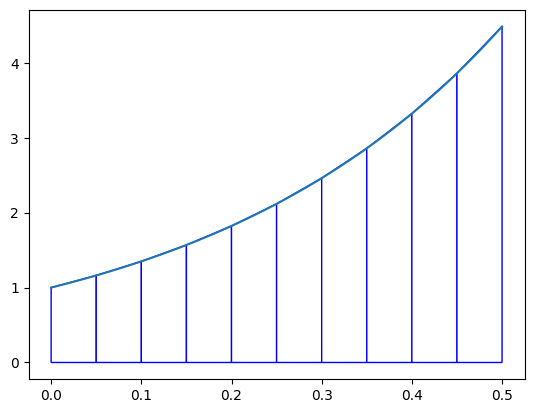

Значение интеграла: 1.1634251422076218


In [15]:
# Оснащение
def equipment(w, a, b, n):
  c = []
  for i in range(1, n + 1):
    ci = 0
    if w == 'left':
      ci = a + (b - a) * (i - 1) / n
    elif w == 'right':
      ci = a + (b - a) * i / n
    elif w == 'aver':
      ci = a + (b - a) * (i - 0.5) / n
    elif w == 'rand':
      ci = a + (b - a) * (i - 1) / n + random.uniform(0, (b - a) / n)
    elif w == "trap":
      ci = a + (b - a) * (i - 1) / n

    c.append(ci)
  return c

# Считаем интегральную сумму для данных разбиения, a, b
def calculate_integral(yh, a, b, n, w):
  if w == "trap":
    integral = (sum(yh) - 0.5*yh[0] - 0.5*yh[-1]) * (b - a) / n
  else:
    integral = sum(yh) * (b - a) / n
  return integral

# Рисуем интеграл и интегральную сумму
def draw(x, y, a, b, n, yh):
  fig, ax = plt.subplots()
  ax.plot(x, y)
  if w == "trap":
    for i in range(1, n + 1):
      ax.add_patch(Polygon([(xh[i-1], 0), (xh[i-1], yh[i-1]), (xh[i], yh[i]), (xh[i], 0)],
                            edgecolor = 'blue',
                            facecolor = 'white'))
  else:
    for i in range(1, n + 1):
      ax.add_patch(Rectangle((a + (b - a) * (i - 1) / n, 0), (b - a) / n, yh[i - 1],
                            edgecolor = 'blue',
                            facecolor = 'white'))
  plt.show()

# Точность
accuracy = 100

# Создали иксы и игреки
x = [x for x in arange(a, b + 1 / accuracy, 1 / accuracy)]
y = [eval(str_func) for x in arange(a, b + 1 / accuracy, 1 / accuracy)]

# Создали значения для прямоугольников
xh = equipment(w, a, b, n) # оснащение
if w == "trap":
  xh.append(b)
yh = foo(str_func, xh) # высота

draw(x, y, a, b, n, yh)

print('Значение интеграла:', calculate_integral(yh, a, b, n, w))